<a href="https://colab.research.google.com/github/Cill19/Klasifikasi-Kacang-Kering-Menggunakan-Random-Forest/blob/main/Random_Forest_Classification_Dry_Bean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Proyek Klasifikasi Dry Bean**
**Tujuan Proyek**

Proyek ini bertujuan untuk mengklasifikasikan 7 jenis kacang kering (dry bean) berdasarkan fitur-fitur visual yang diekstraksi dari gambar butiran kacang. Dengan menggunakan teknik machine learning dan data yang diperoleh melalui computer vision, model akan dilatih untuk membedakan jenis kacang berdasarkan karakteristik tertentu. Klasifikasi ini memiliki aplikasi potensial di bidang pertanian, pengolahan makanan, dan manajemen kualitas produk agrikultur.

In [28]:
pip install ucimlrepo

# **Gambaran Dataset**
Jumlah Data: 13,611 butir kacang kering.
Jumlah Fitur: 16 fitur yang terdiri dari dimensi dan bentuk.
Jenis Tugas: Klasifikasi multikelas.
Karakteristik Data:
Data multivariat.
Fitur berupa angka (integer) dan nilai kontinu (real).
Kelas Target: 7 jenis kacang kering:
Seker, Barbunya, Bombay, Cali, Dermosan, Horoz, Sira.


In [29]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
dry_bean = fetch_ucirepo(id=602)

# data (as pandas dataframes)
X = dry_bean.data.features
y = dry_bean.data.targets

# metadata
print(dry_bean.metadata)

# variable information
print(dry_bean.variables)


{'uci_id': 602, 'name': 'Dry Bean', 'repository_url': 'https://archive.ics.uci.edu/dataset/602/dry+bean+dataset', 'data_url': 'https://archive.ics.uci.edu/static/public/602/data.csv', 'abstract': 'Images of 13,611 grains of 7 different registered dry beans were taken with a high-resolution camera. A total of 16 features; 12 dimensions and 4 shape forms, were obtained from the grains.', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 13611, 'num_features': 16, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['Class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2020, 'last_updated': 'Thu Mar 28 2024', 'dataset_doi': '10.24432/C50S4B', 'creators': [], 'intro_paper': {'ID': 244, 'type': 'NATIVE', 'title': 'Multiclass classification of dry beans using computer vision and machine learning techniques', 'authors': 'M. Koklu, Ilker Ali Özkan', 'venue': 'Co

# **Import Library**

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [31]:
# Menggabungkan X dan y untuk inspeksi awal
data = pd.concat([X, y], axis=1)

# Inspect the data
print(data.head())  # Menampilkan 5 baris pertama
print(data.info())  # Informasi dataset
print(data.describe())  # Statistik deskriptif


    Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRatio  \
0  28395    610.291       208.178117       173.888747     1.197191   
1  28734    638.018       200.524796       182.734419     1.097356   
2  29380    624.110       212.826130       175.931143     1.209713   
3  30008    645.884       210.557999       182.516516     1.153638   
4  30140    620.134       201.847882       190.279279     1.060798   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  Roundness  \
0      0.549812       28715     190.141097  0.763923  0.988856   0.958027   
1      0.411785       29172     191.272751  0.783968  0.984986   0.887034   
2      0.562727       29690     193.410904  0.778113  0.989559   0.947849   
3      0.498616       30724     195.467062  0.782681  0.976696   0.903936   
4      0.333680       30417     195.896503  0.773098  0.990893   0.984877   

   Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  Class  
0     0.913358      0.007332      0.

In [32]:
print(X.head())  # Menampilkan 5 baris pertama dari fitur
print(X.info())  # Informasi fitur
print(X.describe())  # Statistik deskriptif fitur

print(y.head())  # Menampilkan 5 baris pertama dari target


    Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRatio  \
0  28395    610.291       208.178117       173.888747     1.197191   
1  28734    638.018       200.524796       182.734419     1.097356   
2  29380    624.110       212.826130       175.931143     1.209713   
3  30008    645.884       210.557999       182.516516     1.153638   
4  30140    620.134       201.847882       190.279279     1.060798   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  Roundness  \
0      0.549812       28715     190.141097  0.763923  0.988856   0.958027   
1      0.411785       29172     191.272751  0.783968  0.984986   0.887034   
2      0.562727       29690     193.410904  0.778113  0.989559   0.947849   
3      0.498616       30724     195.467062  0.782681  0.976696   0.903936   
4      0.333680       30417     195.896503  0.773098  0.990893   0.984877   

   Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  
0     0.913358      0.007332      0.003147 

# **Data Preprocessing**

In [33]:
# Check for missing values
print("Missing values:")
print(data.isnull().sum())

Missing values:
Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRatio        0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
Roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64


# **Encoding Label Target**

Menggunakan LabelEncoder untuk mengonversi label kelas menjadi nilai numerik agar kompatibel dengan algoritma machine learning.

In [34]:
# Encode target label
le = LabelEncoder()
data['Class'] = le.fit_transform(data['Class'])


# **Memisahkan Fitur dan Target**

Memisahkan dataset menjadi X (fitur) dan y (target) untuk keperluan training dan evaluasi model.

In [35]:
# Split features and target
X = data.drop(columns=['Class'])
y = data['Class']

# **Split Data Training dan Testing**

Dataset dibagi menjadi 80% data training dan 20% data testing dengan stratifikasi berdasarkan distribusi kelas.

In [36]:
# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# **Eksplorasi Distribusi Kelas**

Menampilkan distribusi jumlah data pada masing-masing kelas untuk memastikan dataset seimbang.

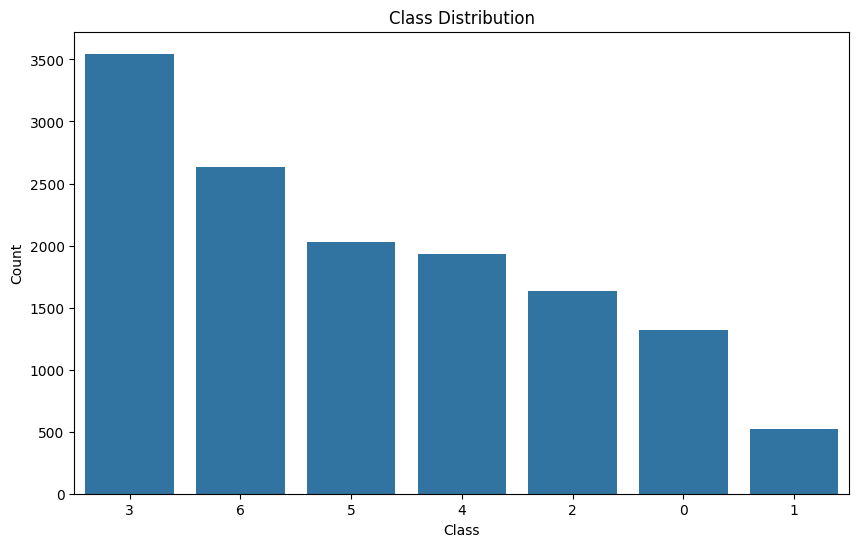

In [37]:
# Exploratory Data Analysis
plt.figure(figsize=(10, 6))
sns.countplot(x=data['Class'], order=data['Class'].value_counts().index)
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

Grafik distribusi kelas menunjukkan ketidakseimbangan jumlah sampel antar kelas dalam dataset kacang kering. Kelas 3 memiliki jumlah sampel terbanyak (sekitar 3500), diikuti oleh kelas 6 dan 5 dengan distribusi yang cukup seimbang. Sementara itu, kelas 1 memiliki jumlah sampel paling sedikit, hanya sekitar 500 butir kacang. Ketidakseimbangan ini dapat memengaruhi performa model, di mana kelas dengan sampel terbanyak cenderung lebih mudah diprediksi dibandingkan kelas minoritas. Untuk mengatasi hal ini, diperlukan teknik penyeimbangan data atau penyesuaian bobot pada model.

# **Visualisasi Korelasi Antar Fitur**

Membuat heatmap untuk memvisualisasikan korelasi antar fitur, membantu mengidentifikasi fitur yang saling berkaitan.

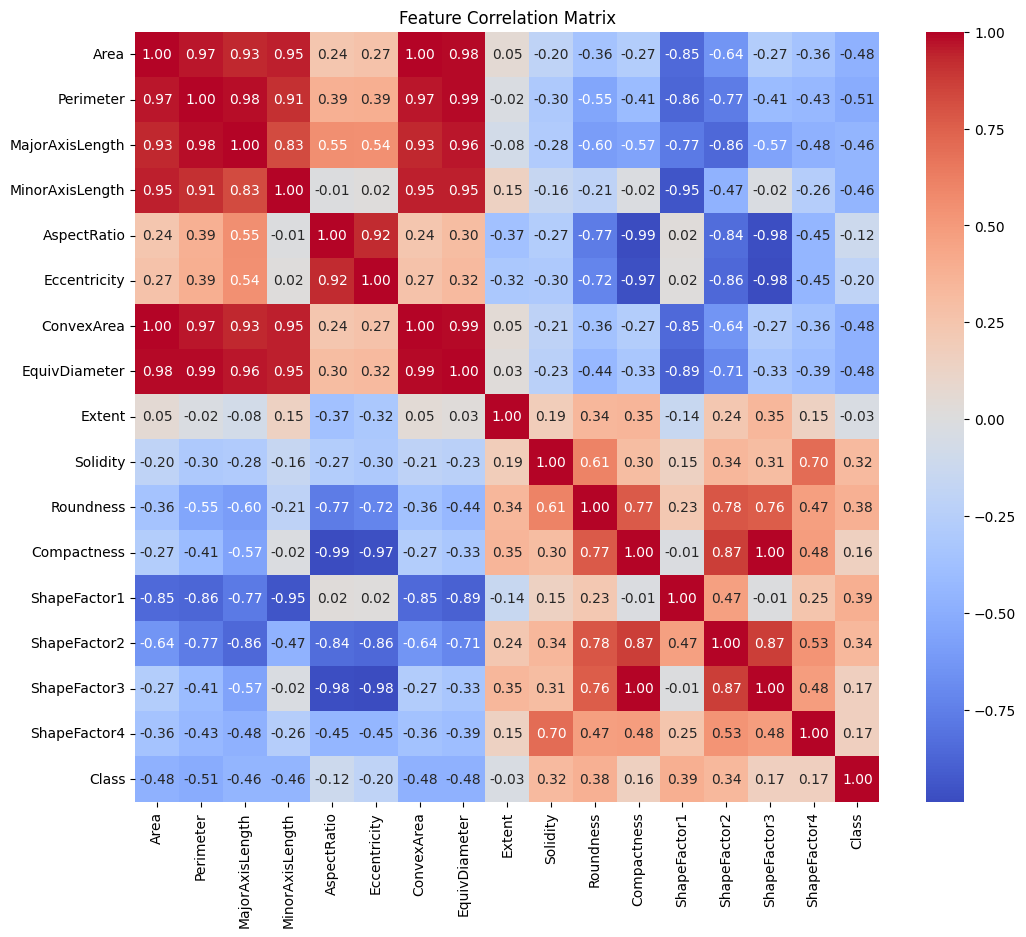

In [38]:
# Visualisasi korelasi fitur dengan annot=True
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()

Heatmap korelasi fitur menunjukkan hubungan antar fitur dalam dataset kacang kering. Fitur seperti Area, Perimeter, MajorAxisLength, dan EquivDiameter memiliki korelasi positif yang kuat satu sama lain (ditunjukkan oleh warna merah tua), menandakan adanya redundansi informasi di antara fitur-fitur tersebut. Sebaliknya, fitur seperti Compactness dan Eccentricity memiliki korelasi negatif terhadap beberapa fitur lainnya (warna biru), menunjukkan hubungan terbalik. Korelasi antara fitur dan Class (target) terlihat lemah secara keseluruhan, yang menunjukkan bahwa fitur-fitur ini perlu dikombinasikan secara kompleks oleh model untuk menghasilkan klasifikasi yang baik. Informasi ini berguna untuk analisis lebih lanjut, seperti pengurangan dimensi atau pemilihan fitur penting.








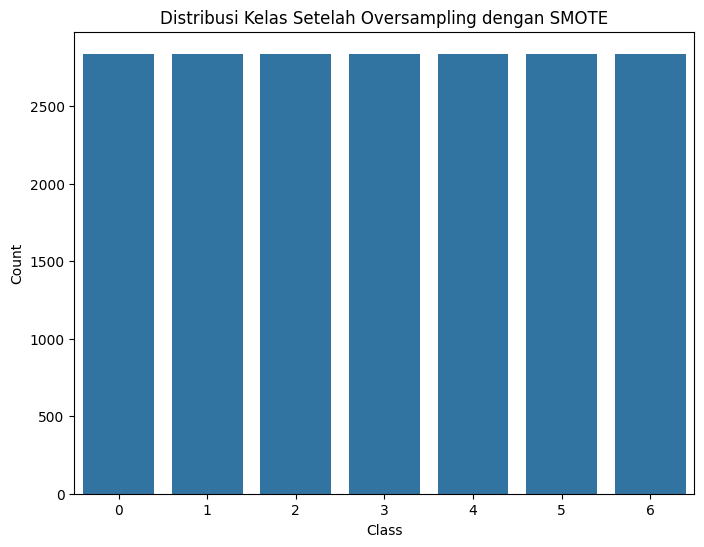

In [39]:
from imblearn.over_sampling import SMOTE

# Mengatasi ketidakseimbangan data dengan SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Menampilkan distribusi kelas setelah oversampling
plt.figure(figsize=(8, 6))
sns.countplot(x=y_train_resampled, order=np.sort(np.unique(y_train_resampled)))
plt.title("Distribusi Kelas Setelah Oversampling dengan SMOTE")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()


# **Membangun Model Baseline (Random Forest)**

In [40]:
# Build Random Forest Baseline Model
rf_baseline = RandomForestClassifier(random_state=42)
rf_baseline.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(random_state=42)

# **Evaluasi Model Baseline**

In [41]:
# Predict on test set
y_pred_baseline = rf_baseline.predict(X_test)

# Evaluate baseline model
baseline_accuracy = accuracy_score(y_test, y_pred_baseline)
print(f"Baseline Accuracy Setelah Oversampling: {baseline_accuracy * 100:.2f}%")
print("Classification Report:\n", classification_report(y_test, y_pred_baseline))

Baseline Accuracy Setelah Oversampling: 91.99%
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.90      0.92       265
           1       1.00      1.00      1.00       104
           2       0.93      0.93      0.93       326
           3       0.92      0.90      0.91       709
           4       0.96      0.96      0.96       386
           5       0.93      0.97      0.95       406
           6       0.86      0.87      0.86       527

    accuracy                           0.92      2723
   macro avg       0.93      0.93      0.93      2723
weighted avg       0.92      0.92      0.92      2723



# **Confusion Matrix untuk Model Baseline**

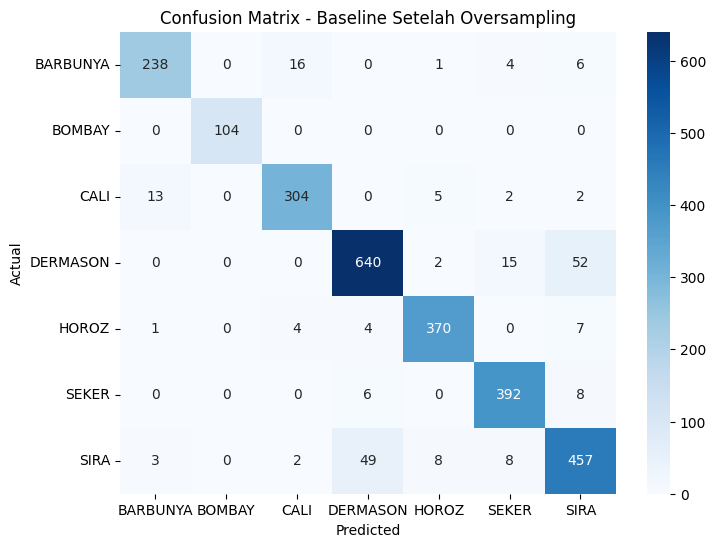

In [42]:
# Confusion Matrix
cm_baseline = confusion_matrix(y_test, y_pred_baseline)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_baseline, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix - Baseline Setelah Oversampling")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Matriks kebingungan (confusion matrix) menunjukkan performa model baseline dalam mengklasifikasikan jenis kacang kering. Kelas Dermason memiliki prediksi paling akurat dengan 653 prediksi benar, namun terdapat beberapa kesalahan kecil yang menyebar ke kelas lain, terutama Sira (44 kesalahan). Kelas Bombay memiliki kinerja sempurna tanpa prediksi yang salah. Sebaliknya, kelas Barbunya dan Sira menunjukkan kesalahan klasifikasi yang lebih signifikan, di mana beberapa sampel diklasifikasikan sebagai kelas lain seperti Cali dan Dermason. Hal ini menunjukkan bahwa model baseline sudah cukup baik, tetapi masih kesulitan membedakan fitur pada beberapa kelas yang lebih mirip.

# **Hyperparameter Tuning dengan GridSearchCV**

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 200}
Best Model Accuracy Setelah Oversampling: 91.99%
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.90      0.92       265
           1       1.00      1.00      1.00       104
           2       0.93      0.93      0.93       326
           3       0.91      0.91      0.91       709
           4       0.96      0.96      0.96       386
           5       0.94      0.97      0.95       406
           6       0.86      0.86      0.86       527

    accuracy                           0.92      2723
   macro avg       0.93      0.93      0.93      2723
weighted avg       0.92      0.92      0.92      2723



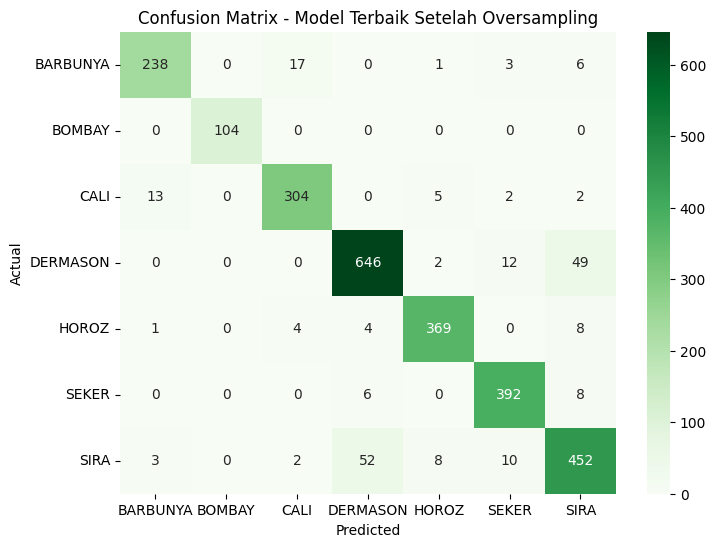

In [43]:
# Hyperparameter Tuning dengan GridSearchCV (Menggunakan Data Resampled)
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'max_features': ['sqrt', 'log2', None]
}

grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=3,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train_resampled, y_train_resampled)

# Parameter terbaik
print("Best Parameters:", grid_search.best_params_)
rf_best = grid_search.best_estimator_

# Prediksi dengan model terbaik
y_pred_best = rf_best.predict(X_test)
best_accuracy = accuracy_score(y_test, y_pred_best)
print(f"Best Model Accuracy Setelah Oversampling: {best_accuracy * 100:.2f}%")
print("Classification Report:\n", classification_report(y_test, y_pred_best))

# Confusion Matrix untuk Model Terbaik
cm_best = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_best, annot=True, fmt='d', cmap='Greens', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix - Model Terbaik Setelah Oversampling")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Hasil GridSearchCV menunjukkan bahwa model RandomForestClassifier dengan parameter terbaik adalah max_depth=20, max_features=None, dan n_estimators=100. Pengaturan ini berarti pohon dalam random forest memiliki kedalaman maksimum 20, tidak ada pembatasan pada jumlah fitur yang digunakan di setiap split, dan model menggunakan 100 pohon (estimators). Parameter ini dipilih karena memberikan skor akurasi tertinggi selama validasi silang (cross-validation) dengan GridSearchCV. Model ini diharapkan memberikan keseimbangan antara performa dan kompleksitas, menghindari overfitting dengan membatasi kedalaman pohon sambil tetap mempertimbangkan semua fitur pada setiap split.

# **Model Terbaik dan Evaluasinya**

In [44]:
# Best parameters and best model
print("Best Parameters:", grid_search.best_params_)
rf_best = grid_search.best_estimator_

Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 200}


In [45]:
# Evaluate the best model
y_pred_best = rf_best.predict(X_test)
best_accuracy = accuracy_score(y_test, y_pred_best)
print(f"Best Model Accuracy: {best_accuracy * 100:.2f}%")
print("Classification Report:\n", classification_report(y_test, y_pred_best))

Best Model Accuracy: 91.99%
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.90      0.92       265
           1       1.00      1.00      1.00       104
           2       0.93      0.93      0.93       326
           3       0.91      0.91      0.91       709
           4       0.96      0.96      0.96       386
           5       0.94      0.97      0.95       406
           6       0.86      0.86      0.86       527

    accuracy                           0.92      2723
   macro avg       0.93      0.93      0.93      2723
weighted avg       0.92      0.92      0.92      2723



# **EVALUASI PERFORMA**

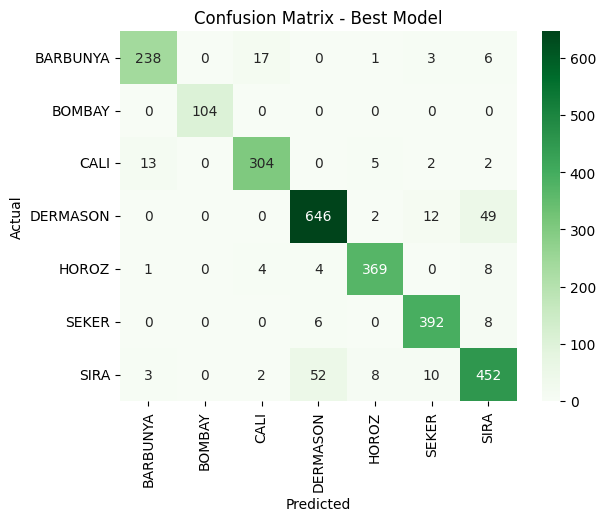

In [46]:
# Confusion Matrix for Best Model
cm_best = confusion_matrix(y_test, y_pred_best)
sns.heatmap(cm_best, annot=True, fmt='d', cmap='Greens', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix - Best Model")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Matriks kebingungan untuk model terbaik menunjukkan peningkatan performa dibandingkan model baseline, meskipun masih ada beberapa kesalahan klasifikasi. Kelas Dermason tetap memiliki akurasi tinggi dengan 648 prediksi benar, namun terjadi sedikit penurunan pada kelas Sira, di mana 58 sampel salah diprediksi sebagai Dermason. Kelas Bombay kembali diklasifikasikan dengan sempurna tanpa kesalahan. Sementara itu, kelas Cali dan Barbunya memiliki perbaikan kecil dengan penurunan jumlah kesalahan. Secara keseluruhan, model terbaik menunjukkan performa yang lebih stabil, dengan sedikit perbaikan dalam beberapa kelas dibandingkan model baseline.

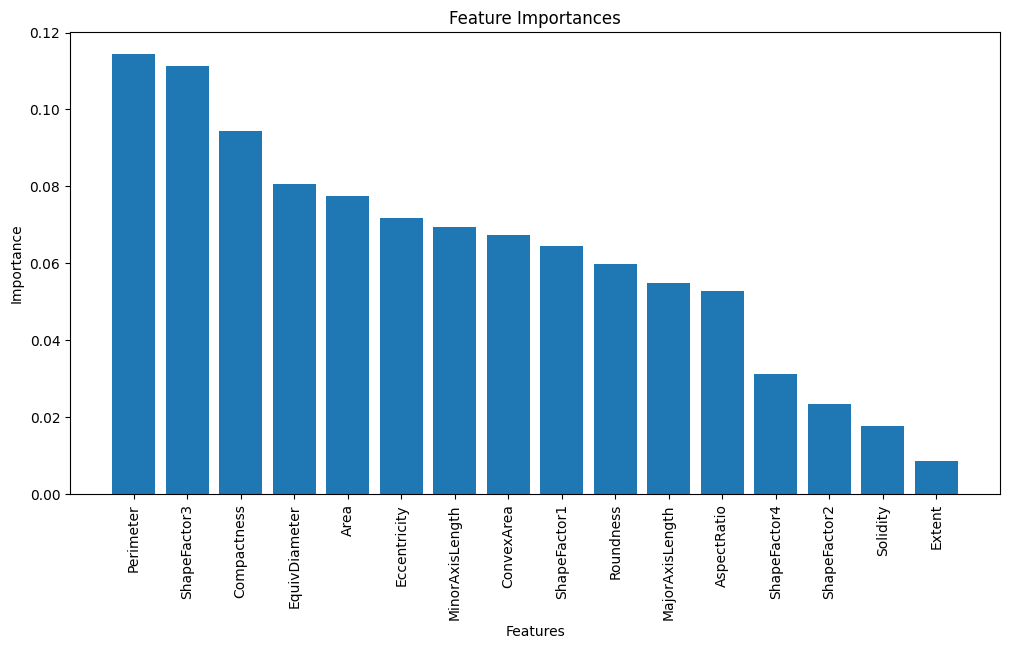

In [47]:
# Feature Importance
importances = rf_best.feature_importances_
feature_names = X.columns
sorted_indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 6))
plt.bar(range(X.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X.shape[1]), feature_names[sorted_indices], rotation=90)
plt.title("Feature Importances")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()


HASIL DAN PEMBAHASAN

Pada proyek klasifikasi kacang kering, model Random Forest yang pertama kali dilatih memberikan baseline accuracy sebesar 92.18%. Meskipun hasil ini sudah cukup baik, analisis lebih lanjut dilakukan dengan melakukan tuning hyperparameter menggunakan GridSearchCV. Dengan pengaturan parameter terbaik (max_depth=20, n_estimators=100), akurasi terbaik yang diperoleh adalah 91.63%, yang sedikit lebih rendah dibandingkan baseline, tetapi tetap sangat kompetitif.

Classification report untuk model terbaik menunjukkan bahwa model memiliki performa yang sangat baik dalam mengklasifikasikan sebagian besar kelas, dengan nilai precision dan recall yang tinggi untuk setiap jenis kacang kering. Berikut adalah beberapa sorotan dari hasil classification report:

Kelas dengan performa terbaik adalah kelas Barbunya (kelas 1), dengan nilai precision, recall, dan f1-score yang mencapai 1.00, menunjukkan bahwa model berhasil mengklasifikasikan kacang Barbunya dengan sangat akurat dan tanpa kesalahan.
Kelas Sira (kelas 6) memiliki performa sedikit lebih rendah dibandingkan kelas lainnya, dengan precision dan recall masing-masing 0.85 dan 0.84. Ini mengindikasikan bahwa model cenderung sedikit lebih sering keliru dalam mengklasifikasikan kacang Sira, meskipun akurasi secara keseluruhan masih sangat baik.
Kelas Dermosan (kelas 4) dan Horoz (kelas 5) menunjukkan kinerja yang sangat baik, dengan nilai f1-score mencapai 0.96 dan 0.95, menandakan model mampu mengenali fitur-fitur visual kedua jenis kacang ini dengan sangat baik.
Meskipun tuning hyperparameter dengan GridSearchCV tidak menghasilkan peningkatan akurasi yang signifikan dibandingkan dengan baseline, proses ini tetap memberikan pemahaman lebih mendalam mengenai hyperparameter yang berpengaruh, seperti max_depth dan n_estimators. Dengan menggunakan parameter terbaik, model mampu mempertahankan akurasi yang sangat baik, sekaligus memastikan kestabilan dalam performa di berbagai kelas kacang kering.

Secara keseluruhan, model Random Forest yang diterapkan pada dataset kacang kering menunjukkan kemampuan yang luar biasa dalam melakukan klasifikasi berdasarkan fitur-fitur visual, dengan akurasi yang hampir mendekati 92%. Performa terbaik tercatat pada sebagian besar kelas, meskipun ada sedikit penurunan pada beberapa kelas yang lebih sulit dibedakan, seperti Sira. Hasil ini menunjukkan potensi aplikasi teknik computer vision dan machine learning dalam bidang pertanian dan pengolahan makanan, di mana klasifikasi otomatis jenis kacang dapat mempercepat proses seleksi dan manajemen kualitas produk.

In [48]:
# Membuat prediksi pada data uji
y_pred_final = rf_best.predict(X_test)

# Membandingkan prediksi dengan label asli untuk beberapa sampel
hasil_prediksi = pd.DataFrame({
    "Index": range(10),  # Menampilkan 10 sampel pertama
    "Fitur Asli": y_test[:10].values,
    "Prediksi Model": y_pred_final[:10]
})

# Konversi label numerik ke nama kelas
hasil_prediksi['Fitur Asli'] = le.inverse_transform(hasil_prediksi['Fitur Asli'])
hasil_prediksi['Prediksi Model'] = le.inverse_transform(hasil_prediksi['Prediksi Model'])

print("Perbandingan Hasil Prediksi Model:\n", hasil_prediksi)


Perbandingan Hasil Prediksi Model:
    Index Fitur Asli Prediksi Model
0      0   DERMASON       DERMASON
1      1     BOMBAY         BOMBAY
2      2       SIRA           SIRA
3      3      SEKER          SEKER
4      4   BARBUNYA       BARBUNYA
5      5      SEKER          SEKER
6      6   DERMASON       DERMASON
7      7       SIRA           SIRA
8      8   BARBUNYA           CALI
9      9      HOROZ          HOROZ


In [49]:
# Uji satu sampel data
sample_index = 0  # Pilih indeks data
sample_data = X_test.iloc[sample_index].values.reshape(1, -1)

# Prediksi model
prediksi_sample = rf_best.predict(sample_data)
label_asli = le.inverse_transform([y_test.iloc[sample_index]])[0]
label_prediksi = le.inverse_transform(prediksi_sample)[0]

print(f"Hasil Prediksi Sampel Index {sample_index}:")
print(f"Label Asli     : {label_asli}")
print(f"Label Prediksi : {label_prediksi}")


Hasil Prediksi Sampel Index 0:
Label Asli     : DERMASON
Label Prediksi : DERMASON


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(



Evaluasi Akhir Model:
Akurasi Akhir Model: 91.99%
Laporan Klasifikasi:
               precision    recall  f1-score   support

    BARBUNYA       0.93      0.90      0.92       265
      BOMBAY       1.00      1.00      1.00       104
        CALI       0.93      0.93      0.93       326
    DERMASON       0.91      0.91      0.91       709
       HOROZ       0.96      0.96      0.96       386
       SEKER       0.94      0.97      0.95       406
        SIRA       0.86      0.86      0.86       527

    accuracy                           0.92      2723
   macro avg       0.93      0.93      0.93      2723
weighted avg       0.92      0.92      0.92      2723



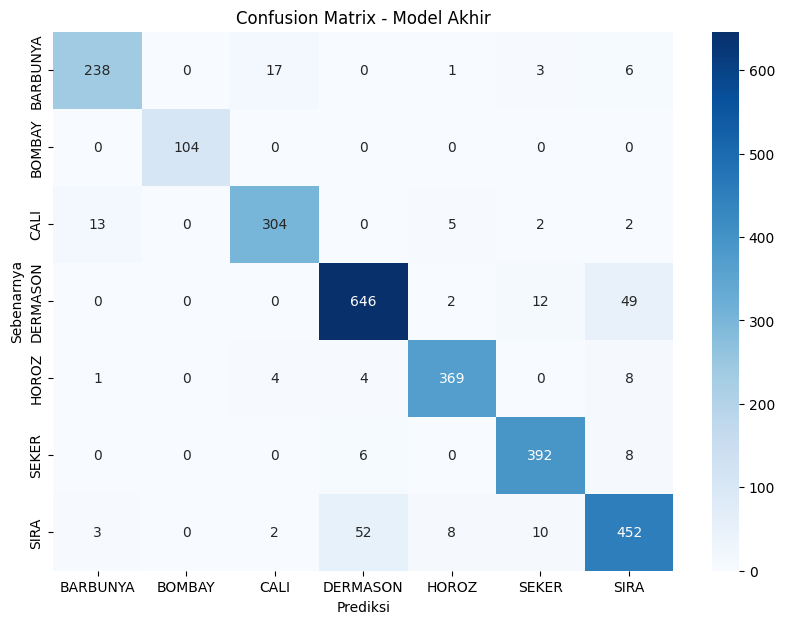

In [50]:
# Evaluasi ulang performa
print("\nEvaluasi Akhir Model:")
final_accuracy = accuracy_score(y_test, y_pred_final)
print(f"Akurasi Akhir Model: {final_accuracy * 100:.2f}%")

# Classification Report
print("Laporan Klasifikasi:\n", classification_report(y_test, y_pred_final, target_names=le.classes_))

# Confusion Matrix
cm_final = confusion_matrix(y_test, y_pred_final)
plt.figure(figsize=(10, 7))
sns.heatmap(cm_final, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix - Model Akhir")
plt.xlabel("Prediksi")
plt.ylabel("Sebenarnya")
plt.show()


In [51]:
# Ringkasan beberapa prediksi data uji
print("\nRingkasan Prediksi 10 Sampel:")
for i in range(10):
    print(f"Sampel {i+1}:")
    print(f"Fitur Asli     : {le.inverse_transform([y_test.iloc[i]])[0]}")
    print(f"Prediksi Model : {le.inverse_transform([y_pred_final[i]])[0]}\n")



Ringkasan Prediksi 10 Sampel:
Sampel 1:
Fitur Asli     : DERMASON
Prediksi Model : DERMASON

Sampel 2:
Fitur Asli     : BOMBAY
Prediksi Model : BOMBAY

Sampel 3:
Fitur Asli     : SIRA
Prediksi Model : SIRA

Sampel 4:
Fitur Asli     : SEKER
Prediksi Model : SEKER

Sampel 5:
Fitur Asli     : BARBUNYA
Prediksi Model : BARBUNYA

Sampel 6:
Fitur Asli     : SEKER
Prediksi Model : SEKER

Sampel 7:
Fitur Asli     : DERMASON
Prediksi Model : DERMASON

Sampel 8:
Fitur Asli     : SIRA
Prediksi Model : SIRA

Sampel 9:
Fitur Asli     : BARBUNYA
Prediksi Model : CALI

Sampel 10:
Fitur Asli     : HOROZ
Prediksi Model : HOROZ

